In [1]:
import matplotlib

%matplotlib inline

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows",16)
LARGE_FIGURE = (12,8)

In [4]:
%ls

Scipy 2016 pandas.ipynb  data/                    pandas_tutorial-master/


In [5]:
pd.read_table?

In [6]:
filename = "data/temperatures/annual.land_ocean.90S.90N.df_1901-2000mean.dat"
full_global_temp = pd.read_table(filename)
full_global_temp

,1880 -0.1591
0,1881 -0.0789
1,1882 -0.1313
2,1883 -0.1675
3,1884 -0.2485
4,1885 -0.2042
5,1886 -0.1695
6,1887 -0.2505
7,1888 -0.1605
...,...
122,2003 0.5818


In [7]:
full_global_temp = pd.read_table(filename, sep="\s+", names=["year", "mean temp"], index_col=0)
full_global_temp

,mean temp
year,
1880,-0.1591
1881,-0.0789
1882,-0.1313
1883,-0.1675
1884,-0.2485
1885,-0.2042
1886,-0.1695
1887,-0.2505
...,...


In [8]:
full_global_temp = pd.read_table(filename, sep="\s+", names=["year", "mean temp"], index_col=0
                                , parse_dates = True)
full_global_temp

,mean temp
year,
1880-01-01 00:00:00,-0.1591
1881-01-01 00:00:00,-0.0789
1882-01-01 00:00:00,-0.1313
1883-01-01 00:00:00,-0.1675
1884-01-01 00:00:00,-0.2485
1885-01-01 00:00:00,-0.2042
1886-01-01 00:00:00,-0.1695
1887-01-01 00:00:00,-0.2505
...,...


In [9]:
giss_temp = pd.read_table("data/temperatures/GLB.Ts+dSST.txt", sep="\s+",
                          skiprows = 7,
                         skipfooter = 11, engine= "python")
giss_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2009,56,48,49,57,59,62,66,61,64,58,72,58,59,59,52,55,63,65,2009


In [10]:
giss_temp = pd.read_table("data/temperatures/GLB.Ts+dSST.txt", sep="\s+",
                          skiprows = 7, index_col = 0, parse_dates = True, 
                         skipfooter = 11, engine= "python")
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
giss_temp = pd.read_table("data/temperatures/GLB.Ts+dSST.txt", sep="\s+",
                          skiprows = 7,
                         skipfooter = 11, engine="python")
giss_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2009,56,48,49,57,59,62,66,61,64,58,72,58,59,59,52,55,63,65,2009


In [12]:
giss_temp = pd.read_table("data/temperatures/GLB.Ts+dSST.txt", sep="\s+",
                          skiprows = 7, index_col = 0,
                         skipfooter = 11, engine="python")
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
greenhouse_gaz_temp = pd.read_table("data/greenhouse_gaz/co2_mm_global.txt", sep="\s+", 
                                    parse_dates=[[0,1]],index_col =2 )
greenhouse_gaz_temp

,year_month,decimal,trend
average,,,
338.45,1980-01-01,1980.042,337.82
339.17,1980-02-01,1980.125,338.12
339.49,1980-03-01,1980.208,338.14
339.87,1980-04-01,1980.292,338.25
340.30,1980-05-01,1980.375,338.78
339.86,1980-06-01,1980.458,339.08
338.32,1980-07-01,1980.542,339.17
337.11,1980-08-01,1980.625,339.37
...,...,...,...


In [14]:
greenhouse_gaz_temp = pd.read_table("data/greenhouse_gaz/co2_mm_global.txt", sep="\s+", 
                                    parse_dates=[[0,1]],index_col =0 )
greenhouse_gaz_temp

,decimal,average,trend
year_month,,,
1980-01-01,1980.042,338.45,337.82
1980-02-01,1980.125,339.17,338.12
1980-03-01,1980.208,339.49,338.14
1980-04-01,1980.292,339.87,338.25
1980-05-01,1980.375,340.30,338.78
1980-06-01,1980.458,339.86,339.08
1980-07-01,1980.542,338.32,339.17
1980-08-01,1980.625,337.11,339.37
...,...,...,...


In [15]:
# Local backup: data/sea_levels/sl_nh.txt
northern_sea_level = pd.read_table("http://sealevel.colorado.edu/files/current/sl_nh.txt", 
                                   sep="\s+")
northern_sea_level

,year,msl_ib(mm),#version_2016_rel4
0,1992.9323,13.717,NaN
1,1992.9595,1.328,NaN
2,1992.9866,-13.375,NaN
3,1993.0138,-24.723,NaN
4,1993.0409,-29.231,NaN
5,1993.0681,-32.538,NaN
6,1993.0952,-35.588,NaN
7,1993.1223,-26.579,NaN
...,...,...,...
861,2016.3611,56.282,NaN


In [16]:
# Local backup: data/sea_levels/sl_sh.txt
southern_sea_level = pd.read_table("http://sealevel.colorado.edu/files/current/sl_sh.txt", 
                                   sep="\s+")
southern_sea_level

,year,msl_ib(mm),#version_2016_rel4
0,1992.9323,2.517,NaN
1,1992.9595,-7.645,NaN
2,1992.9866,-2.267,NaN
3,1993.0138,0.855,NaN
4,1993.0409,-2.020,NaN
5,1993.0681,-0.398,NaN
6,1993.0952,4.102,NaN
7,1993.1223,6.787,NaN
...,...,...,...
861,2016.3611,66.331,NaN


In [17]:
# The 2015 version of the global dataset:
# Local backup: data/sea_levels/sl_ns_global.txt
url = "http://sealevel.colorado.edu/files/2015_rel2/sl_ns_global.txt"
global_sea_level = pd.read_table(url, sep="\s+")
global_sea_level

,year,msl_ib_ns(mm),#version_2015_rel2
0,1992.9595,-5.818,NaN
1,1992.9866,-7.525,NaN
2,1993.0138,-9.215,NaN
3,1993.0409,-11.796,NaN
4,1993.0681,-11.291,NaN
5,1993.0952,-9.569,NaN
6,1993.1223,-3.714,NaN
7,1993.1495,-2.471,NaN
...,...,...,...
772,2014.9494,70.723,NaN


### From a local or remote HTML file
To be able to grab more local data about mean sea levels, we can download and extract data about mean sea level stations around the world from the PSMSL (http://www.psmsl.org/). Again to download and parse all tables in a webpage, just give `read_html` the URL to parse:

In [18]:
import html5lib
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
# Local backup in data/sea_levels/Obtaining Tide Gauge Data.html
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [19]:
table_list

[                 Station Name    ID    Lat.     Lon.  GLOSS ID   Country    \
 0                    HELIGMAN   231  60.200   19.300         NaN       ALA   
 1                KOBBAKLINTAR    63  60.033   19.883         NaN       ALA   
 2                    LEMSTROM    84  60.100   20.017         NaN       ALA   
 3             FOGLO / DEGERBY   249  60.032   20.385         NaN       ALA   
 4                   PAGO PAGO   539 -14.280 -170.690       144.0       ASM   
 5             BAHIA ESPERANZA   988 -63.300  -56.917       185.0       ATA   
 6           ARGENTINE ISLANDS   913 -65.246  -64.257       188.0       ATA   
 7            PUERTO SOBERANIA  1603 -62.483  -59.633       189.0       ATA   
 ...                       ...   ...     ...      ...         ...       ...   
 1478                   DANANG  1475  16.100  108.217         NaN       VNM   
 1479                   HONNGU  1003  18.800  105.767         NaN       VNM   
 1480                   HONDAU   841  20.667  106.80

In [20]:
table_list[0]

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,06/10/2015,60,281
4,PAGO PAGO,539,-14.280,-170.690,144.0,ASM,08/03/2016,745,1
5,BAHIA ESPERANZA,988,-63.300,-56.917,185.0,ATA,11/05/1999,999,1
6,ARGENTINE ISLANDS,913,-65.246,-64.257,188.0,ATA,21/05/2015,999,3
7,PUERTO SOBERANIA,1603,-62.483,-59.633,189.0,ATA,30/09/2004,999,5
...,...,...,...,...,...,...,...,...,...
1478,DANANG,1475,16.100,108.217,NaN,VNM,17/11/2015,605,51


In [21]:
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,06/10/2015,60,281
4,PAGO PAGO,539,-14.280,-170.690,144.0,ASM,08/03/2016,745,1
5,BAHIA ESPERANZA,988,-63.300,-56.917,185.0,ATA,11/05/1999,999,1
6,ARGENTINE ISLANDS,913,-65.246,-64.257,188.0,ATA,21/05/2015,999,3
7,PUERTO SOBERANIA,1603,-62.483,-59.633,189.0,ATA,30/09/2004,999,5
...,...,...,...,...,...,...,...,...,...
1478,DANANG,1475,16.100,108.217,NaN,VNM,17/11/2015,605,51


## 2. Pandas DataStructures


In [22]:
type(giss_temp)

pandas.core.frame.DataFrame

In [23]:
print(giss_temp.shape)
print(giss_temp.dtypes)

(143, 19)
Jan       object
Feb       object
Mar       object
Apr       object
May       object
Jun       object
Jul       object
Aug       object
           ...  
Dec       object
J-D       object
D-N       object
DJF       object
MAM       object
JJA       object
SON       object
Year.1    object
dtype: object


In [24]:
giss_temp.index # vertical axis, axis = 0 

Index([u'1880', u'1881', u'1882', u'1883', u'1884', u'1885', u'1886', u'1887',
       u'1888', u'1889',
       ...
       u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014',
       u'2015', u'Year'],
      dtype='object', name=u'Year', length=143)

In [25]:
giss_temp.columns # horizontal axis , axis = 1

Index([u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug', u'Sep',
       u'Oct', u'Nov', u'Dec', u'J-D', u'D-N', u'DJF', u'MAM', u'JJA', u'SON',
       u'Year.1'],
      dtype='object')

In [26]:
giss_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1880 to Year
Data columns (total 19 columns):
Jan       143 non-null object
Feb       143 non-null object
Mar       143 non-null object
Apr       143 non-null object
May       143 non-null object
Jun       143 non-null object
Jul       143 non-null object
Aug       143 non-null object
Sep       143 non-null object
Oct       143 non-null object
Nov       143 non-null object
Dec       143 non-null object
J-D       143 non-null object
D-N       143 non-null object
DJF       143 non-null object
MAM       143 non-null object
JJA       143 non-null object
SON       143 non-null object
Year.1    143 non-null object
dtypes: object(19)
memory usage: 22.3+ KB


### DataFrame, the pandas 2D structure

In [27]:
type(full_global_temp)

pandas.core.frame.DataFrame

In [28]:
full_global_temp = full_global_temp["mean temp"]

In [29]:
full_global_temp

year
1880-01-01 00:00:00     -0.1591
1881-01-01 00:00:00     -0.0789
1882-01-01 00:00:00     -0.1313
1883-01-01 00:00:00     -0.1675
1884-01-01 00:00:00     -0.2485
1885-01-01 00:00:00     -0.2042
1886-01-01 00:00:00     -0.1695
1887-01-01 00:00:00     -0.2505
                         ...   
2003-01-01               0.5818
2004-01-01               0.5416
2005-01-01               0.6154
2006-01-01               0.5601
2007-01-01               0.5472
2008-01-01               0.4804
2009-01-01               0.5551
2010-01-01            -999.0000
Name: mean temp, dtype: float64

In [30]:
full_global_temp.index

DatetimeIndex(['1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01',
               ...
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name=u'year', length=131, freq=None)

In [32]:
print(type(full_global_temp))
print(full_global_temp.dtype)
print(full_global_temp.shape)
print(full_global_temp.nbytes)

<class 'pandas.core.series.Series'>
float64
(131,)
1048


### NumPy arrays as backend of Pandas

In [33]:
full_global_temp.values

array([ -1.59100000e-01,  -7.89000000e-02,  -1.31300000e-01,
        -1.67500000e-01,  -2.48500000e-01,  -2.04200000e-01,
        -1.69500000e-01,  -2.50500000e-01,  -1.60500000e-01,
        -1.10300000e-01,  -3.01400000e-01,  -2.52700000e-01,
        -2.92600000e-01,  -3.27400000e-01,  -2.88000000e-01,
        -2.14600000e-01,  -1.00900000e-01,  -1.29400000e-01,
        -2.51700000e-01,  -1.35600000e-01,  -1.12500000e-01,
        -1.69300000e-01,  -2.25500000e-01,  -3.44200000e-01,
        -3.79900000e-01,  -2.58300000e-01,  -2.06000000e-01,
        -3.72600000e-01,  -3.92200000e-01,  -4.04100000e-01,
        -3.86000000e-01,  -4.14400000e-01,  -3.42200000e-01,
        -3.19600000e-01,  -1.59900000e-01,  -8.10000000e-02,
        -2.80300000e-01,  -3.22700000e-01,  -2.10600000e-01,
        -2.18600000e-01,  -2.02500000e-01,  -1.39000000e-01,
        -2.22200000e-01,  -2.06300000e-01,  -1.84300000e-01,
        -1.26000000e-01,  -1.92000000e-02,  -1.00700000e-01,
        -9.35000000e-02,

In [34]:
type(full_global_temp.values)

numpy.ndarray

### Creating new DataFrames manually

Let's make a new frame from the 3 sea level datasets we downloaded above

In [35]:
southern_sea_level.year == northern_sea_level.year

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
       ... 
861    True
862    True
863    True
864    True
865    True
866    True
867    True
868    True
Name: year, dtype: bool

In [36]:
np.all?

In [37]:
np.all(southern_sea_level.year == northern_sea_level.year)

True

In [38]:
len(global_sea_level.year) == len(northern_sea_level)

False

In [40]:
mean_sea_level = pd.DataFrame({"northern_hem":northern_sea_level["msl_ib(mm)"],
                              "southern_hem": southern_sea_level["msl_ib(mm)"],
                              "date" : northern_sea_level.year})

In [41]:
mean_sea_level

,date,northern_hem,southern_hem
0,1992.9323,13.717,2.517
1,1992.9595,1.328,-7.645
2,1992.9866,-13.375,-2.267
3,1993.0138,-24.723,0.855
4,1993.0409,-29.231,-2.020
5,1993.0681,-32.538,-0.398
6,1993.0952,-35.588,4.102
7,1993.1223,-26.579,6.787
...,...,...,...
861,2016.3611,56.282,66.331


In [47]:
mean_sea_level = pd.DataFrame({"northern_hem":northern_sea_level["msl_ib(mm)"],
                              "southern_hem": southern_sea_level["msl_ib(mm)"]},
                              index = northern_sea_level.year)
mean_sea_level

,northern_hem,southern_hem
year,,
1992.9323,NaN,NaN
1992.9595,NaN,NaN
1992.9866,NaN,NaN
1993.0138,NaN,NaN
1993.0409,NaN,NaN
1993.0681,NaN,NaN
1993.0952,NaN,NaN
1993.1223,NaN,NaN
...,...,...


In [48]:
mean_sea_level = pd.DataFrame({"northern_hem":northern_sea_level["msl_ib(mm)"].values,
                              "southern_hem": southern_sea_level["msl_ib(mm)"].values},
                              index = northern_sea_level.year)
mean_sea_level

,northern_hem,southern_hem
year,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
1993.0681,-32.538,-0.398
1993.0952,-35.588,4.102
1993.1223,-26.579,6.787
...,...,...


## 3. Cleaning and formatting data

In [49]:
local_sea_level_stations.columns

Index([u'Station Name', u'ID', u'Lat.', u'Lon.', u'GLOSS ID  ', u'Country  ',
       u'Date', u'Coastline  ', u'Station  '],
      dtype='object')

In [50]:
local_sea_level_stations.columns = [name.strip().replace(".","")
                                   for name in local_sea_level_stations.columns]
local_sea_level_stations.columns

Index([u'Station Name', u'ID', u'Lat', u'Lon', u'GLOSS ID', u'Country',
       u'Date', u'Coastline', u'Station'],
      dtype='object')

In [51]:
mean_sea_level.index.name = "date"
mean_sea_level

,northern_hem,southern_hem
date,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
1993.0681,-32.538,-0.398
1993.0952,-35.588,4.102
1993.1223,-26.579,6.787
...,...,...


### Setting missing values

In [53]:
full_global_temp == -999.000

year
1880-01-01 00:00:00    False
1881-01-01 00:00:00    False
1882-01-01 00:00:00    False
1883-01-01 00:00:00    False
1884-01-01 00:00:00    False
1885-01-01 00:00:00    False
1886-01-01 00:00:00    False
1887-01-01 00:00:00    False
                       ...  
2003-01-01             False
2004-01-01             False
2005-01-01             False
2006-01-01             False
2007-01-01             False
2008-01-01             False
2009-01-01             False
2010-01-01              True
Name: mean temp, dtype: bool

In [54]:
full_global_temp[full_global_temp == -999.000] = np.nan
full_global_temp.tail()

year
2006-01-01    0.5601
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
Name: mean temp, dtype: float64

Choosing what is the index

In [55]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [58]:
giss_temp

KeyError: 'Year'

In [59]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Dropping Rows and Columns 

In [60]:
giss_temp.columns

Index([u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug', u'Sep',
       u'Oct', u'Nov', u'Dec', u'J-D', u'D-N', u'DJF', u'MAM', u'JJA', u'SON',
       u'Year.1'],
      dtype='object')

In [61]:
giss_temp = giss_temp.drop("Year.1", axis=1)
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [62]:
# We can also just select the columns we want to keep:
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', 
                       u'Aug', u'Sep', u'Oct', u'Nov', u'Dec']]
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40
...,...,...,...,...,...,...,...,...,...,...,...,...


In [63]:
giss_temp = giss_temp.drop("Year")

In [64]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40
...,...,...,...,...,...,...,...,...,...,...,...,...


In [65]:
giss_temp = giss_temp.where(giss_temp != "****",np.nan)
giss_temp.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,45,44,57,60,47,54,70,69,52,60,50,48
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61
2014,68,44,71,72,79,62,50,74,81,78,64,74
2015,75,80,84,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
global_sea_level.index = global_sea_level["year"]

In [68]:
global_sea_level

,year,msl_ib_ns(mm),#version_2015_rel2
year,,,
1992.9595,1992.9595,-5.818,NaN
1992.9866,1992.9866,-7.525,NaN
1993.0138,1993.0138,-9.215,NaN
1993.0409,1993.0409,-11.796,NaN
1993.0681,1993.0681,-11.291,NaN
1993.0952,1993.0952,-9.569,NaN
1993.1223,1993.1223,-3.714,NaN
1993.1495,1993.1495,-2.471,NaN
...,...,...,...


### Adding colums

In [69]:
mean_sea_level

,northern_hem,southern_hem
date,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
1993.0681,-32.538,-0.398
1993.0952,-35.588,4.102
1993.1223,-26.579,6.787
...,...,...


In [70]:
mean_sea_level["mean_global"] = global_sea_level["msl_ib_ns(mm)"]

In [71]:
mean_sea_level

,northern_hem,southern_hem,mean_global
date,,,
1992.9323,13.717,2.517,NaN
1992.9595,1.328,-7.645,-5.818
1992.9866,-13.375,-2.267,-7.525
1993.0138,-24.723,0.855,-9.215
1993.0409,-29.231,-2.020,-11.796
1993.0681,-32.538,-0.398,-11.291
1993.0952,-35.588,4.102,-9.569
1993.1223,-26.579,6.787,-3.714
...,...,...,...


In [75]:

global_sea_level = global_sea_level.set_index("year")
global_sea_level["msl_ib_ns(mm)"]

year
1992.9595    -5.818
1992.9866    -7.525
1993.0138    -9.215
1993.0409   -11.796
1993.0681   -11.291
1993.0952    -9.569
1993.1223    -3.714
1993.1495    -2.471
              ...  
2014.9494    70.723
2014.9766    70.522
2015.0037    66.662
2015.0309    64.804
2015.0580    62.115
2015.0852    68.589
2015.1123    69.745
2015.1395    75.007
Name: msl_ib_ns(mm), dtype: float64

In [76]:
mean_sea_level["mean_global"] = global_sea_level["msl_ib_ns(mm)"]
mean_sea_level

,northern_hem,southern_hem,mean_global
date,,,
1992.9323,13.717,2.517,NaN
1992.9595,1.328,-7.645,-5.818
1992.9866,-13.375,-2.267,-7.525
1993.0138,-24.723,0.855,-9.215
1993.0409,-29.231,-2.020,-11.796
1993.0681,-32.538,-0.398,-11.291
1993.0952,-35.588,4.102,-9.569
1993.1223,-26.579,6.787,-3.714
...,...,...,...


### Changes dtypes of series

In [77]:
giss_temp.dtypes

Jan    object
Feb    object
Mar    object
Apr    object
May    object
Jun    object
Jul    object
Aug    object
Sep    object
Oct    object
Nov    object
Dec    object
dtype: object

In [78]:
for col in giss_temp.columns:
    giss_temp[col] = giss_temp[col].astype(np.float32)

In [79]:
giss_temp.index.dtype

dtype('O')

In [80]:
giss_temp.index = giss_temp.index.astype(np.float32)

In [81]:
giss_temp.index.dtype 

dtype('float64')

In [82]:
full_global_temp

year
1880-01-01 00:00:00   -0.1591
1881-01-01 00:00:00   -0.0789
1882-01-01 00:00:00   -0.1313
1883-01-01 00:00:00   -0.1675
1884-01-01 00:00:00   -0.2485
1885-01-01 00:00:00   -0.2042
1886-01-01 00:00:00   -0.1695
1887-01-01 00:00:00   -0.2505
                        ...  
2003-01-01             0.5818
2004-01-01             0.5416
2005-01-01             0.6154
2006-01-01             0.5601
2007-01-01             0.5472
2008-01-01             0.4804
2009-01-01             0.5551
2010-01-01                NaN
Name: mean temp, dtype: float64

In [85]:
full_global_temp = full_global_temp.dropna()
full_global_temp

year
1880-01-01 00:00:00   -0.1591
1881-01-01 00:00:00   -0.0789
1882-01-01 00:00:00   -0.1313
1883-01-01 00:00:00   -0.1675
1884-01-01 00:00:00   -0.2485
1885-01-01 00:00:00   -0.2042
1886-01-01 00:00:00   -0.1695
1887-01-01 00:00:00   -0.2505
                        ...  
2002-01-01             0.5745
2003-01-01             0.5818
2004-01-01             0.5416
2005-01-01             0.6154
2006-01-01             0.5601
2007-01-01             0.5472
2008-01-01             0.4804
2009-01-01             0.5551
Name: mean temp, dtype: float64

In [87]:
giss_temp.dropna(how="all").tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011.0,45.0,44.0,57.0,60.0,47.0,54.0,70.0,69.0,52.0,60.0,50.0,48.0
2012.0,38.0,43.0,52.0,62.0,71.0,59.0,50.0,56.0,68.0,73.0,69.0,46.0
2013.0,62.0,52.0,60.0,48.0,56.0,61.0,53.0,61.0,73.0,61.0,75.0,61.0
2014.0,68.0,44.0,71.0,72.0,79.0,62.0,50.0,74.0,81.0,78.0,64.0,74.0
2015.0,75.0,80.0,84.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
giss_temp.fillna(value=0).tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011.0,45.0,44.0,57.0,60.0,47.0,54.0,70.0,69.0,52.0,60.0,50.0,48.0
2012.0,38.0,43.0,52.0,62.0,71.0,59.0,50.0,56.0,68.0,73.0,69.0,46.0
2013.0,62.0,52.0,60.0,48.0,56.0,61.0,53.0,61.0,73.0,61.0,75.0,61.0
2014.0,68.0,44.0,71.0,72.0,79.0,62.0,50.0,74.0,81.0,78.0,64.0,74.0
2015.0,75.0,80.0,84.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
giss_temp.fillna(method="ffill").tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011.0,45.0,44.0,57.0,60.0,47.0,54.0,70.0,69.0,52.0,60.0,50.0,48.0
2012.0,38.0,43.0,52.0,62.0,71.0,59.0,50.0,56.0,68.0,73.0,69.0,46.0
2013.0,62.0,52.0,60.0,48.0,56.0,61.0,53.0,61.0,73.0,61.0,75.0,61.0
2014.0,68.0,44.0,71.0,72.0,79.0,62.0,50.0,74.0,81.0,78.0,64.0,74.0
2015.0,75.0,80.0,84.0,71.0,79.0,62.0,50.0,74.0,81.0,78.0,64.0,74.0


## 4. Basic Visualization

## Line plots

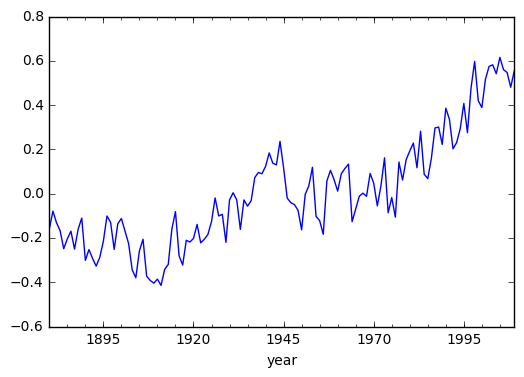

In [90]:
full_global_temp.plot()

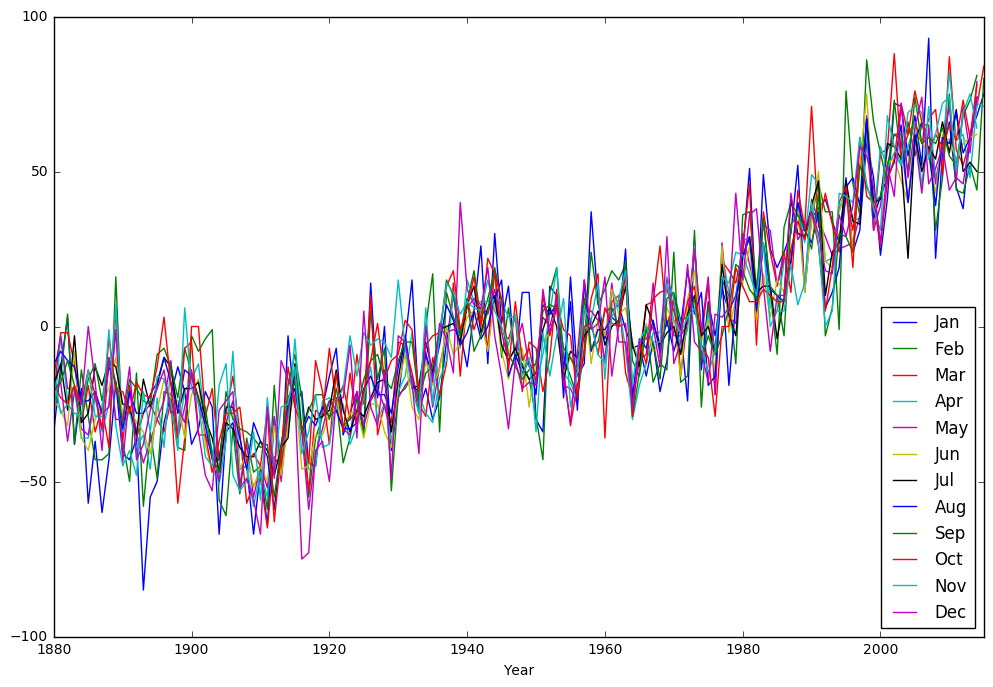

In [91]:
giss_temp.plot(figsize=LARGE_FIGURE)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111f5c3d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ff73850>], dtype=object)

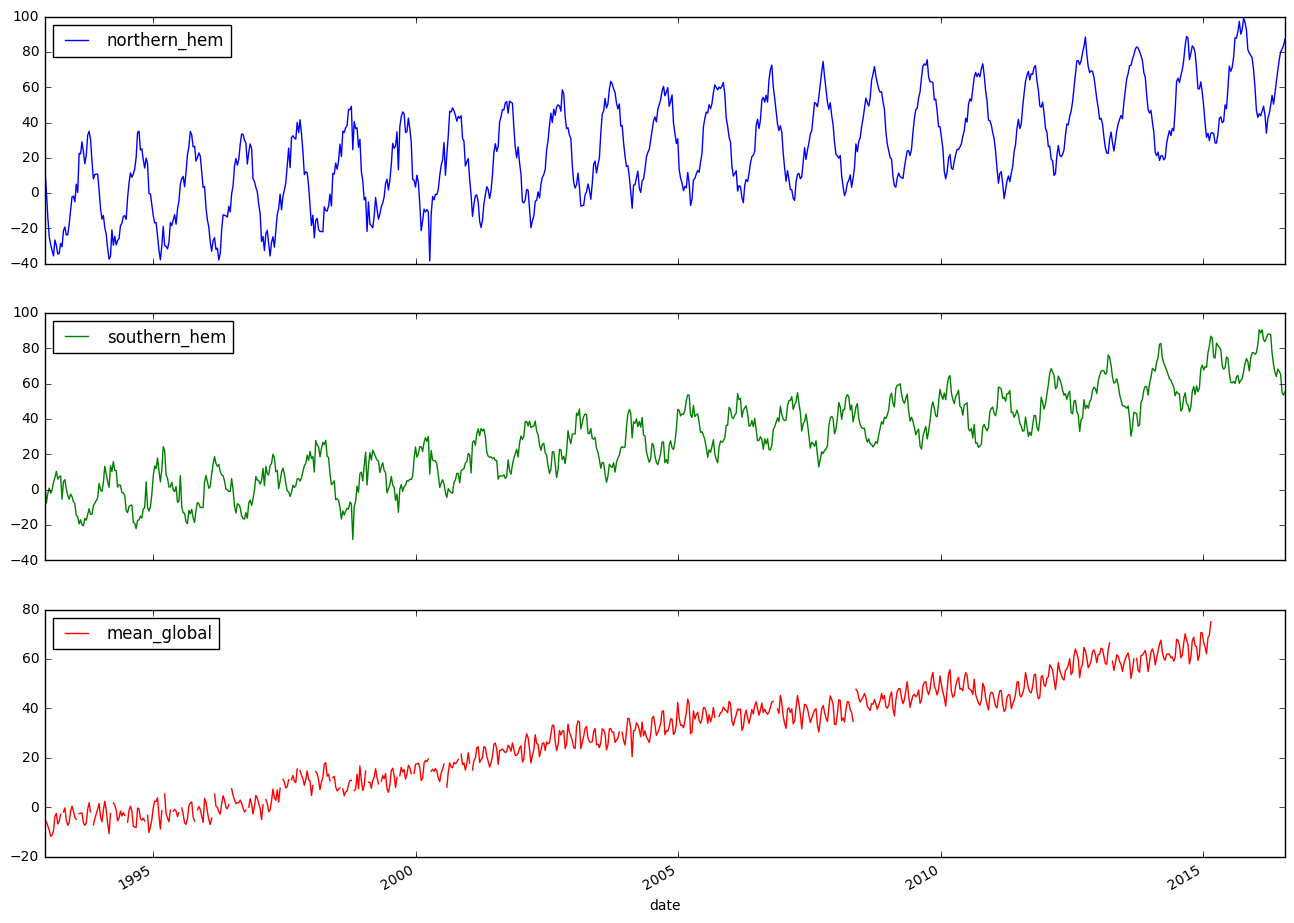

In [92]:
mean_sea_level.plot(subplots=True, figsize=(16,12))

## SHowing Distribution

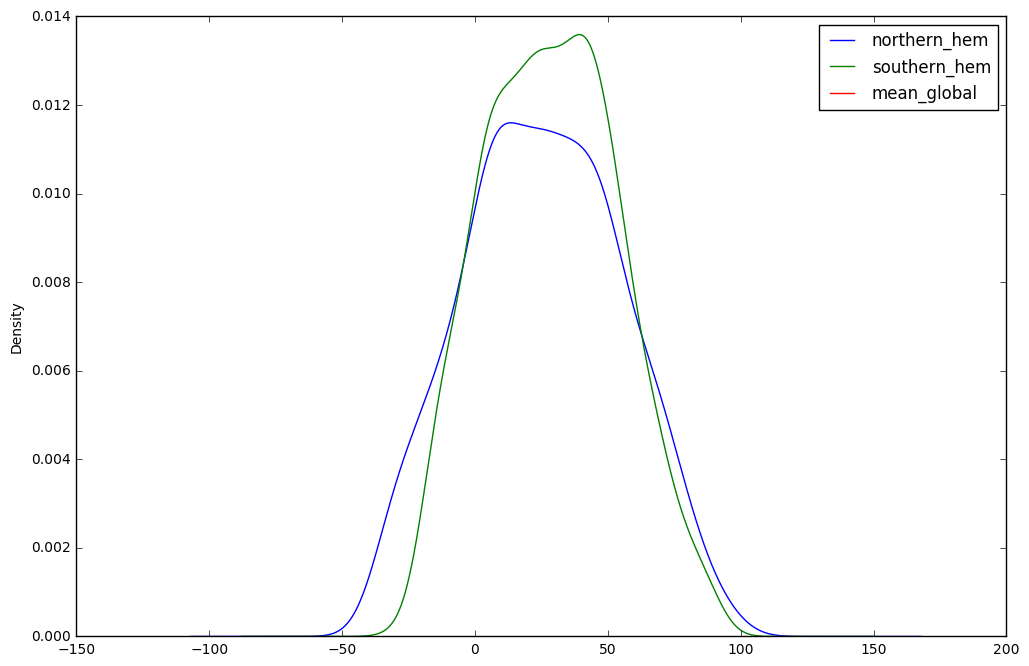

In [93]:
mean_sea_level.plot(kind="kde",figsize=(12,8))

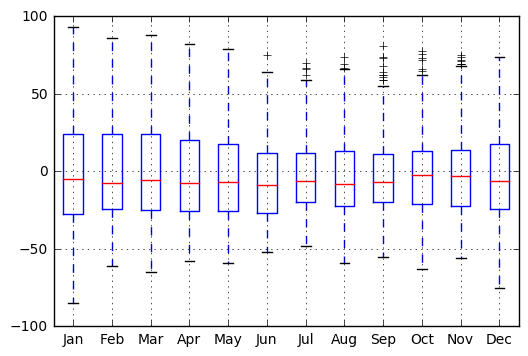

In [94]:
giss_temp.boxplot()

## Correlations 

In [95]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116bc1c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1170e9510>]], dtype=object)

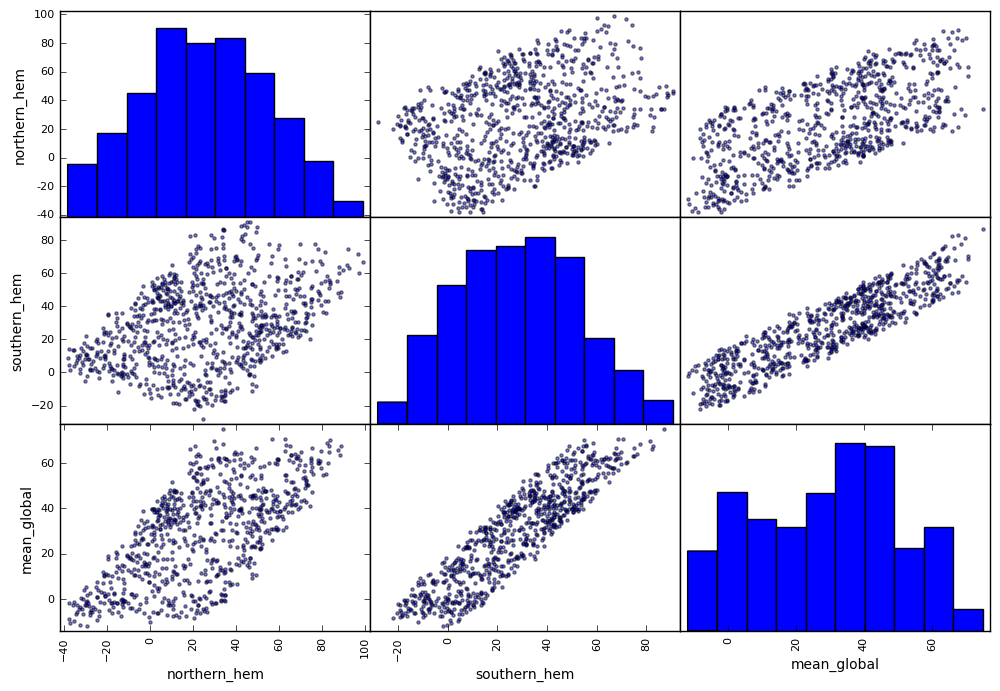

In [99]:
scatter_matrix(mean_sea_level,figsize=LARGE_FIGURE)

## Part 2 

In [100]:
full_global_temp

year
1880-01-01 00:00:00   -0.1591
1881-01-01 00:00:00   -0.0789
1882-01-01 00:00:00   -0.1313
1883-01-01 00:00:00   -0.1675
1884-01-01 00:00:00   -0.2485
1885-01-01 00:00:00   -0.2042
1886-01-01 00:00:00   -0.1695
1887-01-01 00:00:00   -0.2505
                        ...  
2002-01-01             0.5745
2003-01-01             0.5818
2004-01-01             0.5416
2005-01-01             0.6154
2006-01-01             0.5601
2007-01-01             0.5472
2008-01-01             0.4804
2009-01-01             0.5551
Name: mean temp, dtype: float64

In [101]:
full_global_temp.index.dtype

dtype('<M8[ns]')

In [103]:
print( full_global_temp.loc[pd.to_datetime('1990')])

0.3861


In [104]:
full_global_temp

year
1880-01-01 00:00:00   -0.1591
1881-01-01 00:00:00   -0.0789
1882-01-01 00:00:00   -0.1313
1883-01-01 00:00:00   -0.1675
1884-01-01 00:00:00   -0.2485
1885-01-01 00:00:00   -0.2042
1886-01-01 00:00:00   -0.1695
1887-01-01 00:00:00   -0.2505
                        ...  
2002-01-01             0.5745
2003-01-01             0.5818
2004-01-01             0.5416
2005-01-01             0.6154
2006-01-01             0.5601
2007-01-01             0.5472
2008-01-01             0.4804
2009-01-01             0.5551
Name: mean temp, dtype: float64

In [105]:
giss_temp["Jan"]

Year
1880.0   -34.0
1881.0   -13.0
1882.0     3.0
1883.0   -38.0
1884.0   -20.0
1885.0   -57.0
1886.0   -37.0
1887.0   -60.0
          ... 
2008.0    22.0
2009.0    56.0
2010.0    66.0
2011.0    45.0
2012.0    38.0
2013.0    62.0
2014.0    68.0
2015.0    75.0
Name: Jan, dtype: float32

In [106]:
giss_temp.loc[1979,"Dec"]

43.0

In [107]:
giss_temp.loc[1979,"Jan":"Jun"]

Jan    10.0
Feb   -12.0
Mar    14.0
Apr     8.0
May     1.0
Jun     9.0
Name: 1979.0, dtype: float32

In [108]:
giss_temp.loc[1979,::2]

Jan    10.0
Mar    14.0
May     1.0
Jul    -3.0
Sep    20.0
Nov    24.0
Name: 1979.0, dtype: float32

In [109]:
giss_temp["totals"] = giss_temp.sum(axis =1)

In [110]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,totals
Year,,,,,,,,,,,,,
1880.0,-34.0,-27.0,-22.0,-30.0,-16.0,-24.0,-19.0,-12.0,-20.0,-19.0,-16.0,-21.0,-260.0
1881.0,-13.0,-16.0,-2.0,-3.0,-3.0,-27.0,-12.0,-8.0,-18.0,-23.0,-28.0,-18.0,-171.0
1882.0,3.0,4.0,-2.0,-24.0,-20.0,-32.0,-27.0,-11.0,-11.0,-25.0,-25.0,-37.0,-207.0
1883.0,-38.0,-38.0,-12.0,-20.0,-20.0,-8.0,-3.0,-13.0,-19.0,-19.0,-28.0,-21.0,-239.0
1884.0,-20.0,-14.0,-31.0,-36.0,-33.0,-36.0,-31.0,-24.0,-29.0,-25.0,-29.0,-25.0,-333.0
1885.0,-57.0,-29.0,-19.0,-36.0,-35.0,-40.0,-28.0,-24.0,-17.0,-14.0,-14.0,0.0,-313.0
1886.0,-37.0,-43.0,-34.0,-23.0,-21.0,-30.0,-13.0,-21.0,-12.0,-22.0,-29.0,-18.0,-303.0
1887.0,-60.0,-43.0,-26.0,-34.0,-28.0,-25.0,-19.0,-28.0,-24.0,-33.0,-29.0,-40.0,-389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [111]:
local_sea_level_stations.columns

Index([u'Station Name', u'ID', u'Lat', u'Lon', u'GLOSS ID', u'Country',
       u'Date', u'Coastline', u'Station'],
      dtype='object')

In [112]:
local_sea_level_stations

,Station Name,ID,Lat,Lon,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,06/10/2015,60,281
4,PAGO PAGO,539,-14.280,-170.690,144.0,ASM,08/03/2016,745,1
5,BAHIA ESPERANZA,988,-63.300,-56.917,185.0,ATA,11/05/1999,999,1
6,ARGENTINE ISLANDS,913,-65.246,-64.257,188.0,ATA,21/05/2015,999,3
7,PUERTO SOBERANIA,1603,-62.483,-59.633,189.0,ATA,30/09/2004,999,5
...,...,...,...,...,...,...,...,...,...
1478,DANANG,1475,16.100,108.217,NaN,VNM,17/11/2015,605,51


In [113]:
mask = local_sea_level_stations.Country == "USA"

In [114]:
local_sea_level_stations.loc[mask,]

,Station Name,ID,Lat,Lon,GLOSS ID,Country,Date,Coastline,Station
1287,FRENCH FRIGATE SHOALS,1372,23.867,-166.283,107.0,USA,14/10/2013,760,16
1288,FRENCH FRIGATE SHOALS B,2192,23.868,-166.288,107.0,USA,23/06/2014,760,17
1289,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",2129,21.903,-159.592,NaN,USA,24/01/2012,760,19
1290,"NAWILIWILI BAY, KAUAI ISLAND",756,21.953,-159.355,NaN,USA,08/03/2016,760,21
1291,HONOLULU,155,21.307,-157.867,108.0,USA,08/03/2016,760,31
1292,MOKUOLOE ISLAND,823,21.432,-157.790,NaN,USA,08/03/2016,760,41
1293,"LANAI ISLAND, KAUMALAPAU",2273,20.780,-156.900,NaN,USA,05/01/2016,760,43
1294,"KAHULUI HARBOR, MAUI ISLAND",521,20.895,-156.477,NaN,USA,08/03/2016,760,51
...,...,...,...,...,...,...,...,...,...
1457,SEAVEY ISLAND,288,43.080,-70.742,NaN,USA,26/10/1990,960,177


In [115]:
american_stations = local_sea_level_stations["Country"] == "USA"

local_sea_level_stations.loc[american_stations, ["ID", "Station Name"]]

,ID,Station Name
1287,1372,FRENCH FRIGATE SHOALS
1288,2192,FRENCH FRIGATE SHOALS B
1289,2129,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND"
1290,756,"NAWILIWILI BAY, KAUAI ISLAND"
1291,155,HONOLULU
1292,823,MOKUOLOE ISLAND
1293,2273,"LANAI ISLAND, KAUMALAPAU"
1294,521,"KAHULUI HARBOR, MAUI ISLAND"
...,...,...
1457,288,SEAVEY ISLAND


In [116]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,totals
Year,,,,,,,,,,,,,
1880.0,-34.0,-27.0,-22.0,-30.0,-16.0,-24.0,-19.0,-12.0,-20.0,-19.0,-16.0,-21.0,-260.0
1881.0,-13.0,-16.0,-2.0,-3.0,-3.0,-27.0,-12.0,-8.0,-18.0,-23.0,-28.0,-18.0,-171.0
1882.0,3.0,4.0,-2.0,-24.0,-20.0,-32.0,-27.0,-11.0,-11.0,-25.0,-25.0,-37.0,-207.0
1883.0,-38.0,-38.0,-12.0,-20.0,-20.0,-8.0,-3.0,-13.0,-19.0,-19.0,-28.0,-21.0,-239.0
1884.0,-20.0,-14.0,-31.0,-36.0,-33.0,-36.0,-31.0,-24.0,-29.0,-25.0,-29.0,-25.0,-333.0
1885.0,-57.0,-29.0,-19.0,-36.0,-35.0,-40.0,-28.0,-24.0,-17.0,-14.0,-14.0,0.0,-313.0
1886.0,-37.0,-43.0,-34.0,-23.0,-21.0,-30.0,-13.0,-21.0,-12.0,-22.0,-29.0,-18.0,-303.0
1887.0,-60.0,-43.0,-26.0,-34.0,-28.0,-25.0,-19.0,-28.0,-24.0,-33.0,-29.0,-40.0,-389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [118]:
local_sea_level_stations["Country"]

0       ALA
1       ALA
2       ALA
3       ALA
4       ASM
5       ATA
6       ATA
7       ATA
       ... 
1478    VNM
1479    VNM
1480    VNM
1481    VIR
1482    VIR
1483    VIR
1484    VIR
1485    YEM
Name: Country, dtype: object

In [119]:
local_sea_level_stations["Country"].dtype

dtype('O')

In [131]:
local_sea_level_stations

,Station Name,ID,Lat,Lon,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,06/10/2015,60,281
4,PAGO PAGO,539,-14.280,-170.690,144.0,ASM,08/03/2016,745,1
5,BAHIA ESPERANZA,988,-63.300,-56.917,185.0,ATA,11/05/1999,999,1
6,ARGENTINE ISLANDS,913,-65.246,-64.257,188.0,ATA,21/05/2015,999,3
7,PUERTO SOBERANIA,1603,-62.483,-59.633,189.0,ATA,30/09/2004,999,5
...,...,...,...,...,...,...,...,...,...
1478,DANANG,1475,16.100,108.217,NaN,VNM,17/11/2015,605,51


In [121]:
local_sea_level_stations["Country"].unique()

array([u'ALA', u'ASM', u'ATA', u'ARG', u'AUS', u'BHS', u'BHR', u'BGD',
       u'BEL', u'BMU', u'BRA', u'IOT', u'BGR', u'CAN', u'CPV', u'CYM',
       u'CHL', u'CHN', u'CCK', u'COL', u'COG', u'COK', u'CRI', u'CIV',
       u'HRV', u'CUB', u'CYP', u'DNK', u'DOM', u'ECU', u'EGY', u'SLV',
       u'EST', u'FLK', u'FRO', u'FJI', u'FIN', u'FRA', u'GUF', u'PYF',
       u'GEO', u'DEU', u'GHA', u'GIB', u'GRC', u'GRD', u'GLP', u'GUM',
       u'GTM', u'HTI', u'HND', u'HKG', u'ISL', u'IND', u'IDN', u'IRN',
       u'IRL', u'IMN', u'ISR', u'ITA', u'JAM', u'JPN', u'JEY', u'KEN',
       u'KIR', u'PRK', u'KOR', u'LVA', u'LTU', u'MAC', u'MDG', u'MYS',
       u'MDV', u'MLT', u'MHL', u'MTQ', u'MUS', u'MYT', u'MEX', u'FSM',
       u'MCO', u'MNE', u'MAR', u'MOZ', u'MMR', u'NAM', u'NRU', u'NLD',
       u'NCL', u'NZL', u'NGA', u'MNP', u'NOR', u'OMN', u'PAK', u'PLW',
       u'PAN', u'PNG', u'PER', u'PHL', u'POL', u'PRT', u'PRI', u'REU',
       u'ROU', u'RUS', u'SHN', u'WSM', u'SEN', u'SYC', u'SGP', u'SVN',
      

In [132]:
mask = (local_sea_level_stations.Lat >30) & (local_sea_level_stations.Lat < 70)  & (local_sea_level_stations.Lon <-10) & (local_sea_level_stations.Lon > -40)

In [133]:
local_sea_level_stations.loc[mask, ["Country"]]

,Country
467,ISL
468,ISL
954,PRT
955,PRT
956,PRT
957,PRT
958,PRT
959,PRT


In [136]:
np.unique(local_sea_level_stations.loc[mask,["Country"]])

array([u'ISL', u'PRT'], dtype=object)